In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:

# Combine train and test datasets
import pandas as pd

columns = [
    "age", "workclass", "fnlwgt", "education", "educational-num",
    "marital-status", "occupation", "relationship", "race", "gender",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train = pd.read_csv(r"C:/Users/Mayank/Downloads/adult/adult.data", names=columns,
                    na_values='?', skipinitialspace=True)
test = pd.read_csv(r"C:/Users/Mayank/Downloads/adult/adult.test", names=columns,
                   na_values='?', skipinitialspace=True, skiprows=1)

df = pd.concat([train, test], ignore_index=True)

# Fix 'income' column - ensure binary classes
df['income'] = df['income'].astype(str).str.strip().str.replace('.', '', regex=False)

# Drop missing values
df.dropna(inplace=True)

# Encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

print("Classes in income after cleaning:", le.classes_)
df.head()


Classes in income after cleaning: ['<=50K' '>50K']


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df['income'] = df['income'].astype(str)


In [4]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)


In [5]:
df.shape

(45222, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [8]:
df.dropna(inplace=True)  

In [9]:
df.drop_duplicates(inplace=True)

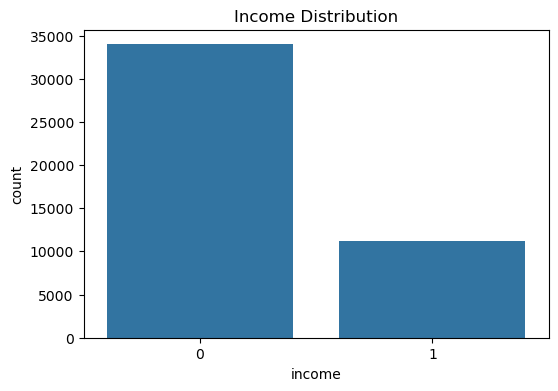

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

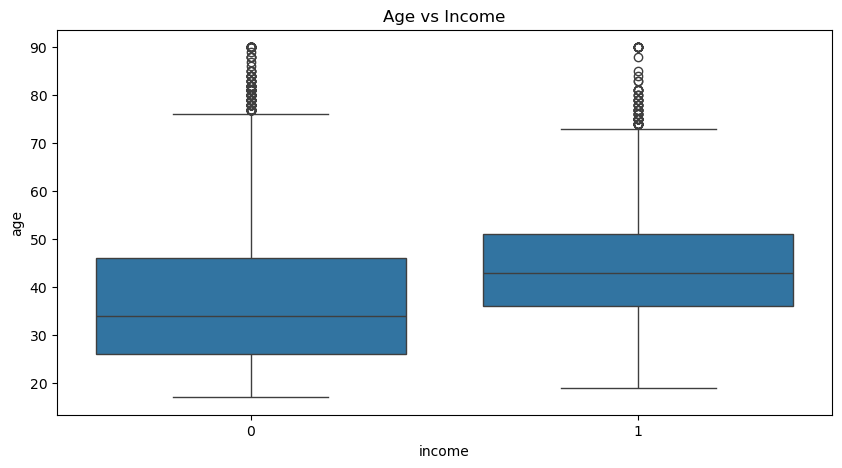

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()


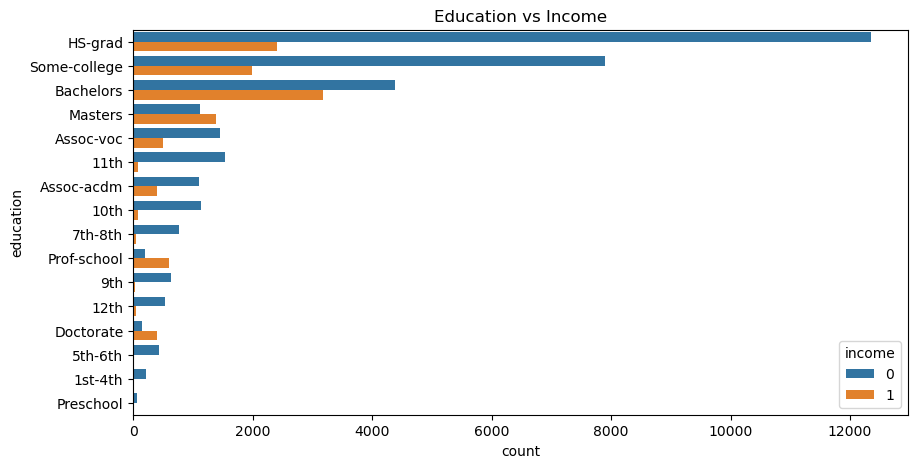

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title("Education vs Income")
plt.show()

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('income', axis=1)
y = df['income']

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
# XGBoost
xg_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_clf.fit(X_train, y_train)
y_pred_xgb = xg_clf.predict(X_test)

D:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:06:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Logistic Regression ---
Accuracy: 0.8220254565578307
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6795
           1       0.72      0.46      0.56      2240

    accuracy                           0.82      9035
   macro avg       0.78      0.70      0.72      9035
weighted avg       0.81      0.82      0.81      9035



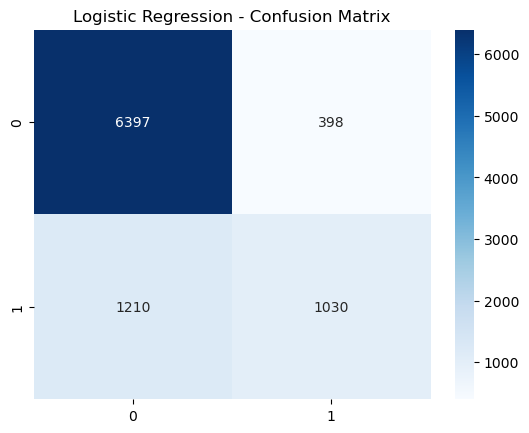


--- Random Forest ---
Accuracy: 0.8474820143884892
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6795
           1       0.73      0.61      0.66      2240

    accuracy                           0.85      9035
   macro avg       0.80      0.77      0.78      9035
weighted avg       0.84      0.85      0.84      9035



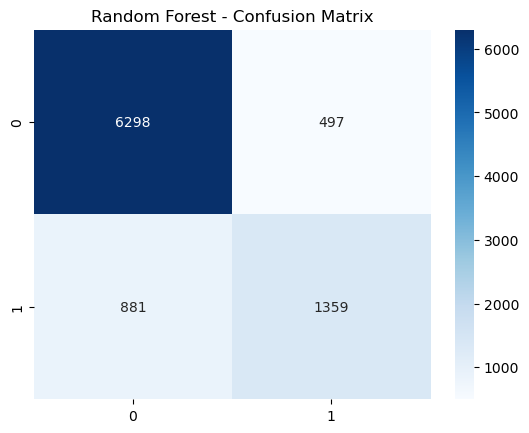


--- XGBoost ---
Accuracy: 0.8639734366353071
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6795
           1       0.77      0.64      0.70      2240

    accuracy                           0.86      9035
   macro avg       0.83      0.79      0.81      9035
weighted avg       0.86      0.86      0.86      9035



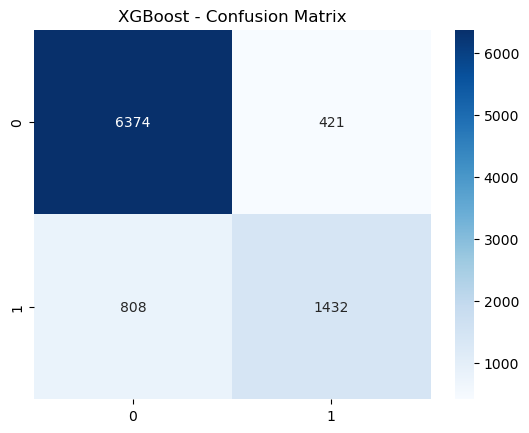

In [19]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

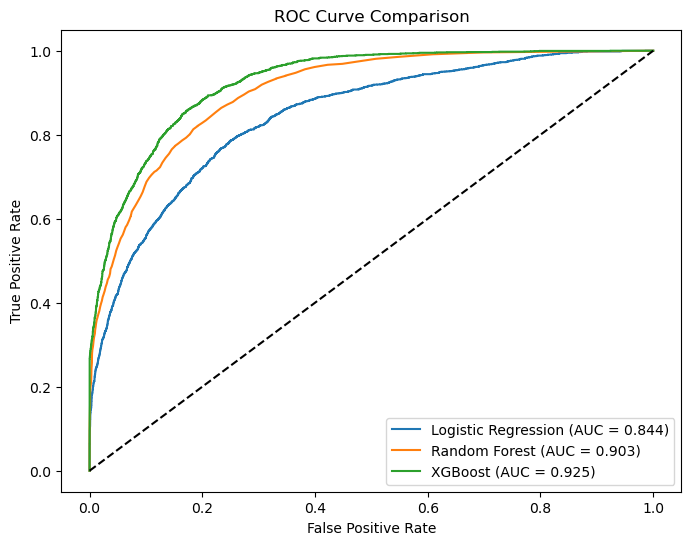

In [21]:
plt.figure(figsize=(8,6))
for model, y_pred_prob in [("Logistic Regression", lr.predict_proba(X_test)[:,1]),
                           ("Random Forest", rf.predict_proba(X_test)[:,1]),
                           ("XGBoost", xg_clf.predict_proba(X_test)[:,1])]:
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [20]:

sample = np.array([[37, 4, 284582, 9, 10, 1, 2, 0, 4, 1, 0, 0, 40, 39]]) 
sample_scaled = scaler.transform(sample)
predicted_income = xg_clf.predict(sample_scaled)
print("\nPredicted Income Class (0 = <=50K, 1 = >50K):", predicted_income)



Predicted Income Class (0 = <=50K, 1 = >50K): [0]


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
